In [ ]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 12s (34.2 MB/s)
(Reading database ... 155676 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155654 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+

#IMPORTING OS AND TENSFLOW
note: importing the model from the strenghtNN folder on my google drive

In [ ]:
import os
import tensorflow as tf

In [ ]:
source_Dir='/content/drive/MyDrive/Strength NN'
categories=['BenchPress_down','BenchPress_up' ,'PullUp_down', 'PullUp_up', 'PushUp_down', 'PushUp_up', 'SitUp_down','SitUp_up' ]
print(os.listdir(source_Dir))

['inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 'model_data - Shortcut.lnk', 'Model.ipynb', 'cuda_11.7.1_windows_network.exe', '.ipynb_checkpoints', 'weights', 'trained_model', 'raw_data', 'weights2', 'trained_model2', 'weights3', 'trained_model3', 'model_data', 'weights3_2', 'trained_model3_2']


importing classification model

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Strength NN/trained_model3/')

# IMAGE CLASSIFIER
runs image(s) through the trained neural network

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  index=np.where(classes[0] == np.amax(classes[0]))
  print(classes,'\t',index[0],'\t',categories[index[0][0]])
 

# VIDEO CLASSIFIER
takes a video,cuts it into frames, resizes it to fit NN-input size then categories every 5th frame

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2
uploaded=files.upload()
cap=None
results_list=[]
category_list=[]
for fn in uploaded.keys():
  path='/content/' + fn
  cap = cv2.VideoCapture(path)
  
  video_fps = cap.get(cv2.CAP_PROP_FPS)
  total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)


  print("fps",video_fps)
  print("total frames",total_frames)
  print("lenght",total_frames/video_fps)

  iterations=int(video_fps/5)
  count=0;
  while True:
      ret, frame = cap.read()
      if not ret: break 
      if count%iterations==0:
        img = image.array_to_img(np.array(frame)).resize((300, 300))
        x=image.img_to_array(img)
        x /= 255
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        index=np.where(classes[0] == np.amax(classes[0]))
        print(count,categories[index[0][0]])
        results_list.append(categories[index[0][0]])
        category_list.append(categories[index[0][0]].split("_")[0])

      count+=1
      if cv2.waitKey(1) & 0xFF == ord('q'): # on press of q break
          break
          
  # release and destroy windows
  cap.release()
  cv2.destroyAllWindows()


  

Saving videoblocks-active-determined-sporty-fitness-african-female-exercising-sit-ups-on-fitness-mat-in-public-park-at-sunrise-beautiful-sportswoman-practicing-crunches-for-abs-and-spinal-flexibility-outdoors_.mp4 to videoblocks-active-determined-sporty-fitness-african-female-exercising-sit-ups-on-fitness-mat-in-public-park-at-sunrise-beautiful-sportswoman-practicing-crunches-for-abs-and-spinal-flexibility-outdoors_.mp4
fps 29.97
total frames 570.0
lenght 19.01901901901902
0 PushUp_down
5 PushUp_down
10 SitUp_down
15 SitUp_down
20 SitUp_up
25 SitUp_up
30 SitUp_up
35 SitUp_up
40 SitUp_up
45 SitUp_up
50 SitUp_up
55 SitUp_up
60 SitUp_up
65 SitUp_up
70 SitUp_up
75 SitUp_up
80 SitUp_up
85 SitUp_up
90 SitUp_up
95 SitUp_down
100 SitUp_down
105 SitUp_down
110 SitUp_down
115 SitUp_down
120 SitUp_down
125 SitUp_down
130 SitUp_down
135 SitUp_up
140 SitUp_up
145 SitUp_up
150 SitUp_up
155 SitUp_up
160 SitUp_up
165 SitUp_up
170 SitUp_up
175 SitUp_up
180 SitUp_up
185 SitUp_up
190 SitUp_up
195 SitUp_u

counts reps and determines excercise based on probability

In [ ]:
categories_found=[]
tally=[]
for category in category_list:
  if category not in categories_found:
    categories_found.append(category)
    tally.append(0)
  index=categories_found.index(category)
  tally[index]=tally[index]+1
index=np.where(tally == np.amax(tally))
category=categories_found[index[0][0]]
reps=0;
curr=results_list[0]
for result in results_list:
  if(result is not curr and category in result):
    reps+=1
    curr=result
reps=reps/2.0
print('there is a',tally[index[0][0]]/len(category_list)*100,'% chance the activity is',category)
print('with',reps,'reps completed')


there is a 98.24561403508771 % chance the activity is SitUp
with 5.0 reps completed


# OCR DETECTION MODEL

In [ ]:
!pip install  -q keras-ocr
import keras_ocr
import matplotlib.pyplot as plt

     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 957 kB 27.4 MB/s 
     |████████████████████████████████| 9.5 MB 50.6 MB/s 
     |████████████████████████████████| 604 kB 49.9 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 


In [ ]:
pipeline=keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
path=[]
for fn in uploaded.keys():
  path.append('/content/' + fn)

Saving b10567e0-9398-4102-bf58-b8837baf9ea4.jpg to b10567e0-9398-4102-bf58-b8837baf9ea4.jpg


In [ ]:
images=[keras_ocr.tools.read(img) for img in path]

In [ ]:
len(images)

1

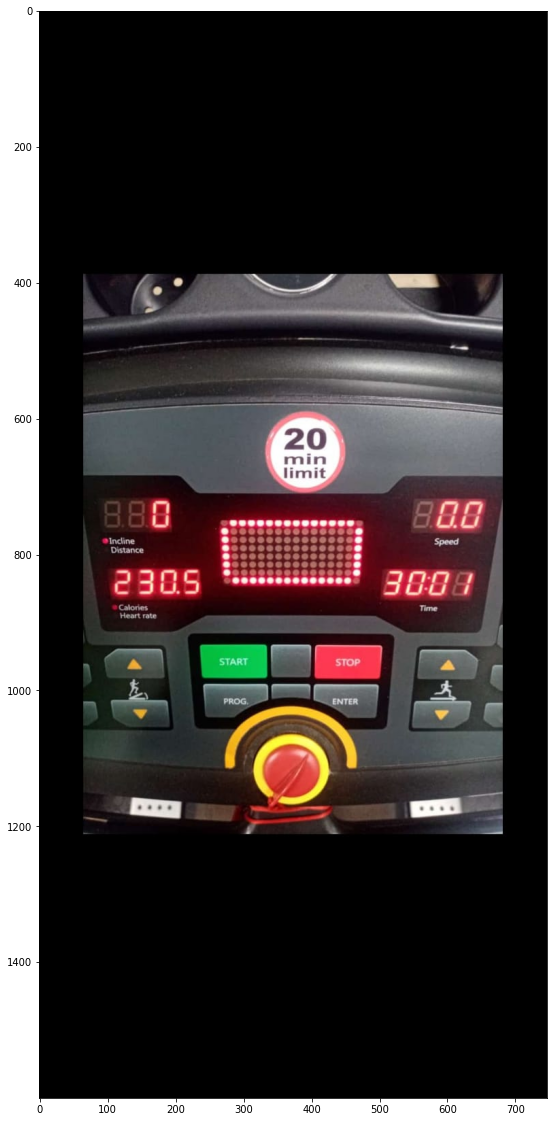

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(images[0])

In [ ]:
prediction_groups=pipeline.recognize(images)

In [ ]:
print(prediction_groups)

[[('20', array([[362.5   , 612.5   ],
       [426.5625, 612.5   ],
       [426.5625, 650.    ],
       [362.5   , 650.    ]], dtype=float32)), ('min', array([[362.5   , 651.5625],
       [425.    , 651.5625],
       [425.    , 671.875 ],
       [362.5   , 671.875 ]], dtype=float32)), ('limit', array([[357.8125, 671.875 ],
       [425.    , 671.875 ],
       [425.    , 690.625 ],
       [357.8125, 690.625 ]], dtype=float32)), ('800', array([[ 93.75   , 718.75   ],
       [195.31247, 718.75   ],
       [195.31247, 764.0625 ],
       [ 93.75   , 764.0625 ]], dtype=float32)), ('80', array([[578.96716, 718.85016],
       [657.41174, 722.1187 ],
       [655.5541 , 766.7028 ],
       [577.1095 , 763.43427]], dtype=float32)), ('b', array([[554.6875, 725.    ],
       [584.375 , 725.    ],
       [584.375 , 760.9375],
       [554.6875, 760.9375]], dtype=float32)), ('incline', array([[101.5625, 773.4375],
       [142.1875, 773.4375],
       [142.1875, 787.5   ],
       [101.5625, 787.5   ]], dty

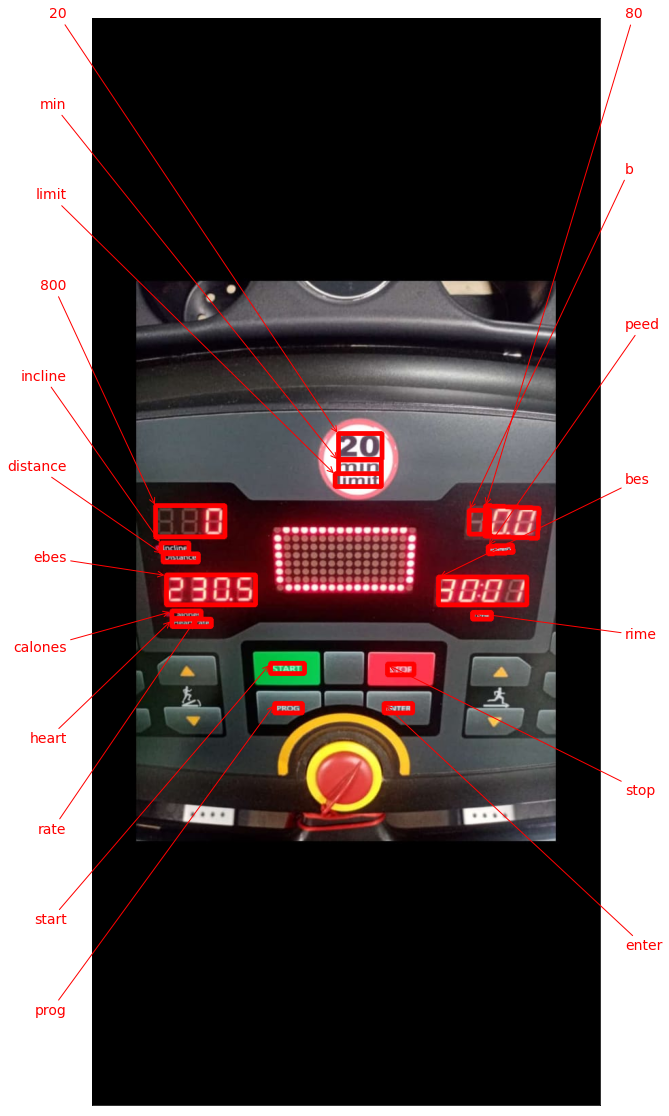

In [ ]:
fig, axs =plt.subplots(nrows=len(images),figsize=(10,20))
for predictions,image in zip(prediction_groups,images):
  keras_ocr.tools.drawAnnotations(image=image,predictions=predictions,ax=axs)

pipeline=keras_ocr.pipeline.Pipeline()